# Simplification of Terrian using Voronoi Delaunay Teselesation

## Background

[MAP GENERALIZATION BY SKELETON RETRACTION](http://icaci.org/files/documents/ICC_proceedings/ICC2001/icc2001/file/f13034.pdf)

[Crust and Anti-Crust: A One-Step Boundary and Skeleton Extraction Algorithm](https://pdfs.semanticscholar.org/164c/7fbe0ab8126b93020153d774780d875f7d69.pdf)

[ADVANTAGES OF THE VORONOI SPATIAL MODEL](https://pdfs.semanticscholar.org/13db/35133b613038ceb635e7e367749d87a94a9a.pdf)

[The Quad-Arc Data Structure](https://www.voronoi.com/wiki/images/4/4d/The_Quad-Arc_data_structure.pdf)

[C++ implementation of Quad Arc data structure](http://www.cs.cmu.edu/afs/andrew/scs/cs/15-463/2001/pub/src/a2/quadedge.html)

## Suplimental sites

[Voronoi.com](https://www.voronoi.com)

[Fortune's algorithm](https://en.wikipedia.org/wiki/Fortune's_algorithm)

[Steve Fortunes site](http://ect.bell-labs.com/who/sjf/)

[- alternate](http://www3.cs.stonybrook.edu/~algorith/implement/fortune/implement.shtml)

[Fortune's algorithm in Java Script by Raymond Hill](http://www.raymondhill.net/voronoi/rhill-voronoi.html)

[GitHub for Raymond Hill's Javascript](https://github.com/gorhill/Javascript-Voronoi)

[pyDelaunay2D](https://github.com/jmespadero/pyDelaunay2D)

[Fortune’s algorithm and implementation](http://blog.ivank.net/fortunes-algorithm-and-implementation.html)

[Another C++ implementation](https://www.cs.hmc.edu/~mbrubeck/voronoi.html)

### Misc
[Simplification of objects for adaptive matching and visualization](http://compbio.mit.edu/publications/_ConferencesBookChapters.pdf)

[SweepLine Voronoi](http://www.wias-berlin.de/people/si/course/files/Fortune87-SweepLine-Voronoi.pdf)

[scipy spacial library](https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/spatial.html)  "The Delaunay triangulation is a subdivision of a set of points into a non-overlapping set of triangles, such that no point is inside the circumcircle of any triangle. In practice, such triangulations tend to avoid triangles with small angles."

```python
from scipy.spatial import Delaunay
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)
```
"scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the **Qhull library**."

***note:** using QHull "http://qhull.org/html/qvoronoi.htm - **Qhull computes the Voronoi diagram via the Delaunay** triangulation."*

### [NON Qhull Line Simplification](https://bost.ocks.org/mike/simplify/)
"To simplify geometry to suit the displayed resolution, various line simplification algorithms exist. While Douglas–Peucker is the most well-known, Visvalingam’s algorithm may be more effective and has a remarkably intuitive explanation: it progressively removes points with the least-perceptible change."

In [3]:
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
import numpy as np
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1], [0.5, 0.25], [0.74, 1.3], [0.4, 0.13], \
                   [0.04, 1.3], [0.24, 0.213], [0.54, 0.83]])
tri = Delaunay(points)

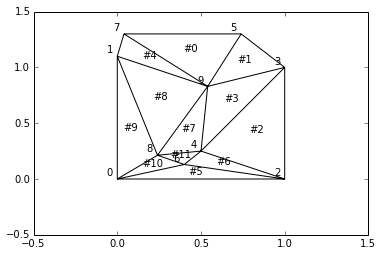

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 1.5)
plt.show()

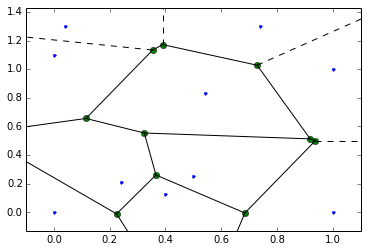

In [5]:
vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()

In [6]:
from IPython.display import IFrame
IFrame("https://en.wikipedia.org/wiki/Fortune's_algorithm#Pseudocode", width=850, height=800)

In [7]:
from IPython.display import IFrame
IFrame('http://www.raymondhill.net/voronoi/rhill-voronoi.html', width=850, height=800)

# Open Source GIS Software, Tools, and Data

[List of tools](https://en.wikipedia.org/wiki/List_of_geographic_information_systems_software)

### Army Core of Engineers 
[GRASS GIS](https://en.wikipedia.org/wiki/GRASS_GIS) "**Geographic Resources Analysis Support System** (commonly termed GRASS GIS) is a geographic information system (GIS) software suite used for geospatial data management and analysis, image processing, producing graphics and maps, spatial and temporal modeling, and visualizing." ***note: Written in	C, C++, Python, Tcl***

[home page](http://grass.osgeo.org/)

[python script](https://grasswiki.osgeo.org/wiki/GRASS_Python_Scripting_Library)

```python
import sys
from grass.script import core as grass

def main():
    drape_map = options['drapemap']
    relief_map = options['reliefmap']
    brighten = options['brighten']
    ret = grass.run_command("d.his", h_map = drape_map,  i_map = relief_map, brighten = brighten)
    sys.exit(ret)

if __name__ == "__main__":
    options, flags = grass.parser()
    main()
```

### Capaware
[Capaware](https://en.wikipedia.org/wiki/Capaware) "**Capaware** is a 3D general purpose virtual worlds viewer."
[home page](http://www.capaware.org/)

## USGS Data

### NHD - National Hydrography Dataset 
[NHD](https://nhd.usgs.gov/) "The **National Hydrography Dataset (NHD)** and Watershed Boundary Dataset (WBD) are used to portray surface water on The National Map."

[data set PDF](https://nhd.usgs.gov/NHDv2.2.1_poster_081216.pdf)


## Related

### OSM
[OpenStreetMap](https://en.wikipedia.org/wiki/OpenStreetMap) "**OpenStreetMap (OSM)** is a collaborative project to create a free editable map of the world."
[home page](https://www.openstreetmap.org/)



# Quad Edge PsuedoCode 

[source](https://www.voronoi.com/wiki/images/4/4d/The_Quad-Arc_data_structure.pdf)

```
Table 1: Quad-Edge Code
{This table gives an object-oriented version of Guibas and Stolfi’s}
{QuakEdgo data structure. its basic functions and example usage.}

TQuad = class
    N:TQuad;                 {next edgeantklockwise}
    R:TQuad;                 {next 1/4 of edge}
    V : TPotnt;              {vertex}
    Index : Interger;        {'name' for debugging}
end;


class function TQuad.MakeEdge(Orig, Dest: TPoint) : TQuad
VU
    Q0, Q1, Q2, Q3 : TQuad;
begin
(create four new 1/4 edges)
    Q0 := TQuad.Create;  Q1 := TQuad.Create;
    Q2 := TQuad.Create;  Q3 := TQuad.Create;
{link the four parts}
    Q0.R := Q1; Q1.R := Q2; Q2.R := Q3;
                            Q3.R := Q0;
(link 0 a 2 to themeelves, 1 a 3 to each other}
    Q0.N := Q0; Q1.N := 03; Q2.N := Q2;
                            Q3.N := Q1;
(met pointers to vertices)
    Q0.SetVertex(Origin); Q2.SetVertex(Dest); Result := Q0;
end;

procedure TQuad.Splice(A,B : TQuad); (A B: input Quad-Edges)
var
    Alpha, Beta, An. Bn. Aln, Ben : TQuad;
begin
{get neighbouring edges: Alpha a Beta in Guibas a Stolft}
    Alpha := A.N.R; Beta := B.N.R;
    An :=A.N; Bn := B.N; Aln := Alpha.N; Ben := Beta.N;
(reconnect the four points)
    AN := Bn; B.N:= An; Alpha.N := Ben; Beta.N := Aln;
end;

function TQuad.Sym : TQuad;  (other end)
begin
    Sym := Self.R.R;
end;
function TQuad.Oprev : TOuad; (next edge clockwlse)
    Oprev := Self.R.N.R;
end:
```

```
function TQuad.Onext : T&ad; {next edge anti-cloclwise}
begin
    Onext := Self.N;
end;
function TQuad.Lnext : TQuad; (next edge clockwise, other end)
begin
    Lnext := Se1f.R.R.R.N.R;
end;
function TQuad.Rprev : TQuad; {next edgo antklockwlae, other end}
begin
    Rprev := Self.R.R.N;
end;
functhn TQuad.Vertex : TPoint; {read vertex}
begin
    Result := Self.V;
end;
procedure TQuad.SetVsrtox(Ptin Tpoint); (set vertex)
begin 
    V := Ptin;
end;

procedure TQuad.Delete; (disconnect and free an edge)
begin
    Splice(Self. Self.Oprev);
    splice(self. sym, sew. Lnext);
    Self. Free;
end;
function TQuad.Swap : Boolean; (swap a diagonal in a triangulation)
var 
    a,b:TQuad;
begin
    Result := False
    a := Self.Oprev; {get adjacent edges}
    b := Self.Lnext;
    if (a.Sym.Vertex <> b.Sym.Vertex) then begin
        Result := True;
        Splke(Self, a);             {disconnect diagonal}
        Splice(Self.Sym, b);
        Splke(Self. aLnext);        {reconnect diagonal}
        Splice(Setf.Sym, b.Lnext);
        SeW.SetVertex(a.SymVertex);
(redefine vertices)
        Self.Sym.SetVertex(b.Sym.Vettex);
    end;
end;

```

[chris gold website - voronoi.com](https://www.voronoi.com/wiki/index.php?title=Spatial_Data_Structures#Quad-edge)

[implementation?](https://www.cs.cmu.edu/afs/andrew/scs/cs/15-463/2001/pub/src/a2/quadedge.html)

[possible existing implementation](https://pypi.python.org/pypi/delaunator)

[github](https://github.com/Aluriak/Delaunator)

[quadEdge](http://pythonhosted.org/delaunator/classEdge.html#ae63dd7c27dea911f8cb90805cceb3be0)

[quad-edge](http://totologic.blogspot.fr/2013/11/core-quad-edge-implementation-explained.html) this is really good!

[opencv triangulation](http://www.learnopencv.com/delaunay-triangulation-and-voronoi-diagram-using-opencv-c-python/)

![Quad Edge](http://www.flashkarting.com/_totologic/quad_edge_scheme.jpg)
Image 1 [source](http://totologic.blogspot.fr/2013/11/core-quad-edge-implementation-explained.html)

In [8]:

import scipy

class TQuad:
    def __init__(self, N, R, V, Index):
        self.N = N
        self.R = R
        self.V = V
        self.Index = Index
        
    def MakeEdge(self, Orig, Dest):
        result = TQuad()
        return 
        

# Simplification (averaging point)

The issue with using a simple averaging of points is that the features are skewed in the direction you average. One idea is to average the points 'N' points at a time to simplify a feature set (usually for resolution or storage see discussion [here](https://bost.ocks.org/mike/simplify/)).

["resize" array - immutable](http://stackoverflow.com/questions/19646726/unsuccessful-append-to-an-empty-numpy-array)

## Lets look at the simplfied example below

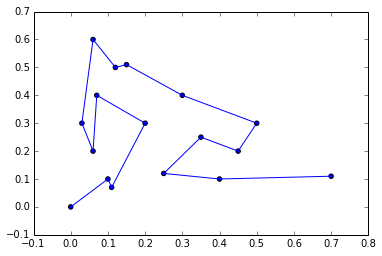

In [18]:
orgpoints = np.array([[0, 0],[0.1, 0.1],[0.11,0.07],[0.2,0.3],[0.07,0.4],[0.06,0.2], [0.03,0.3], [0.06,0.6],[0.12,0.5],[0.15,0.51],[0.3,0.4],[0.5,0.3],[0.45,0.2],[0.35,0.25],[0.25,0.12], [0.4,0.1], [0.7,0.11] ])
#print(orgpoints[:,0])
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.show()


## Simplify points - Left to Right

Now we'll simplify the 17 by 1/3 (roughly, 17 doesn't devide evenly into 1/3 so we'll need to acount for those cases). We will average points from right to left and examine the result.


[0.0, 0.1, 0.11, 0.2, 0.07, 0.06, 0.03, 0.06, 0.12, 0.15, 0.3, 0.5, 0.45, 0.35, 0.25, 0.4, 0.7]


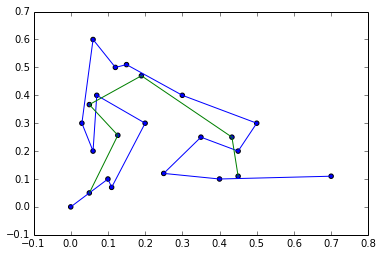

In [123]:
#Get the original points into lists which will act like point stacks
xs = orgpoints[:,0].tolist()
ys = orgpoints[:,1].tolist()
#mean lists will hold the mean averaged points
meanxsLR = []
meanysLR = []
#lets look at the Xs to see we got everything
print(xs)
#pr is the point reduction - '3' is reducing every 3 points to 1 or 1/3 of the points
pr = 3
while xs:
    temp = []
    for i in range(pr):
        if xs:
            temp.append(xs.pop())
    xmean = sum(temp)/len(temp)
    meanxsLR.append(xmean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

while ys:
    temp = []
    for i in range(pr):
        if ys:
            temp.append(ys.pop())
    ymean = sum(temp)/len(temp)
    meanysLR.append(ymean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

#lets plot the average on top of the original to see the changes
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.scatter(meanxsLR,meanysLR)
plt.plot(meanxsLR,meanysLR)
plt.show()

## Simplify points - Right to Left (reverse)

Now we'll simplify the 17 by 1/3 (roughly, 17 doesn't devide evenly into 1/3 so we'll need to acount for those cases). We will average points from left to right and compare the result to the previous result.

[0.7, 0.4, 0.25, 0.35, 0.45, 0.5, 0.3, 0.15, 0.12, 0.06, 0.03, 0.06, 0.07, 0.2, 0.11, 0.1, 0.0]


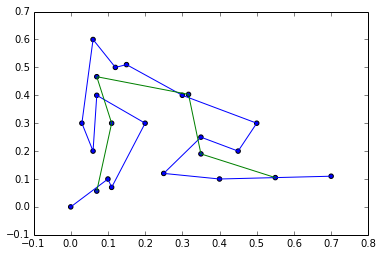

In [122]:
#Now  lets try averaging in the opposite direction
xs = orgpoints[:,0].tolist()
ys = orgpoints[:,1].tolist()
#This time lets reverse the lists to see if the direction we choose to average in makes a difference
xs.reverse()
ys.reverse()
#mean lists will hold the mean averaged points
meanxsRL = []
meanysRL = []
#lets look at the Xs to see we got everything
print(xs)
#pr is the point reduction - '3' is reducing every 3 points to 1 or 1/3 of the points
pr = 3
while xs:
    temp = []
    for i in range(pr):
        if xs:
            temp.append(xs.pop())
    xmean = sum(temp)/len(temp)
    meanxsRL.append(xmean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

while ys:
    temp = []
    for i in range(pr):
        if ys:
            temp.append(ys.pop())
    ymean = sum(temp)/len(temp)
    meanysRL.append(ymean)
    #print("temp %s, xmeam %s" % (temp, xmean)) #debug output

#lets plot the average on top of the original to see the changes
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
plt.scatter(meanxsRL,meanysRL)
plt.plot(meanxsRL,meanysRL)
plt.show()

## Comparing Left to Right vs Right to Left

Lets plot Left Right, Right Left, and the original graph and see the difference

- Original = Blue
- Left to Right = Green 
- Right to Left = Red

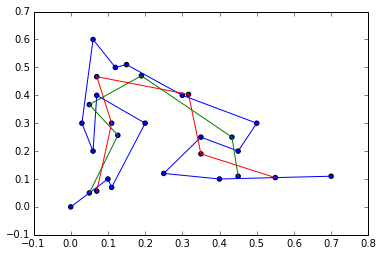

In [124]:
#original in blue
plt.scatter(orgpoints[:,0],orgpoints[:,1])
plt.plot(orgpoints[:,0],orgpoints[:,1])
#Left to Right in Green
plt.scatter(meanxsLR,meanysLR)
plt.plot(meanxsLR,meanysLR)
#Right to Left in Red
plt.scatter(meanxsRL,meanysRL)
plt.plot(meanxsRL,meanysRL)
plt.show()

## Feature loss and distortion

As you can see above the "averaged" graph doesn't retain any of the features of the original (the points are inset, or "shrunk-in", from the original data set). So how do we keep the original features, but reduce the number of points? This is where the skeletal relaxation method discussed in articles above comes into effect. 

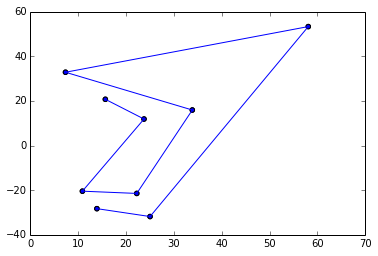

In [125]:
#morepoints = np.array([[13.889598,-28.28427],[13.889597,-28.28427],[25.001275,-31.8198],[25.001276,-31.81981],[58.08377,53.28555],[58.08377,53.28554],[-32.82995,31.31473],[-32.82996,31.31473],[-35.1028,10.6066],[-35.102804,10.6066],[-17.930208,29.04189],[-17.930208,29.04189],[7.323606,32.82996],[7.323606,32.82995],[33.840108,15.90989],[33.84011,15.90989],[22.22335,-21.46573],[22.22336,-21.46573],[0,0],[-6.69226,-9.97525],[-13.76333,-19.95051],[-7.07107,-9.97525],[-14.52094,-19.95051],[-16.03617,-19.95051],[-1.51523,0],[-10.85914,-6.56599],[-19.82424,-13.13198],[-8.9651,-6.566],[-17.5514,-13.13199],[-17.5514,-13.13199],[9.84899,-14.89975],[9.84899,-14.89975],[31.31472,3.03046],[31.31473,3.03046],[36.61803,7.32361],[36.61803,7.3236],[16.16244,-10.85914],[16.16244,-10.85914],[-11.36422,-15.9099],[-11.36421,-15.90991],[-34.85026,6.566],[-34.85026,6.56599],[-7.32361,-6.56599],[-7.32361,-6.566],[7.57614,-11.11167],[7.57615,-11.11168],[0,0],[7.95495,-4.16688],[16.98319,-7.95495],[9.02824,-3.78807],[19.12976,-7.19734],[23.42291,-5.68211],[4.29315,1.51523],[23.10724,8.33376],[40.84805,14.77348],[17.7408,6.43973],[34.40832,12.50064],[34.40832,12.50064],[18.68782,10.85914],[18.68782,10.85914],[30.55711,-24.24366],[30.55712,-24.24367],[7.57614,-44.69925],[7.57615,-44.69925],[-22.72843,-26.76904],[-22.72843,-26.76904],[-51.51778,-8.58629],[-51.51778,-8.5863],[-24.4962,14.14214],[-24.4962,14.14213],[1.76776,21.2132],[1.76777,21.2132],[23.73859,15.65737],[23.73858,15.65736],[31.8198,-7.57614],[31.81981,-7.57614],[-6.31346,-23.23351],[-6.31345,-23.23351],[23.23351,12.87945],[23.23351,12.87944],[9.34391,32.07234],[9.34391,32.07234],[-24.74874,16.66752],[-24.74873,16.66752],[-40.15357,-12.62691],[-40.15356,-12.62691],[-21.46574,-18.18274],[-21.46574,-18.18275],[-17.1726,-39.39595],[-17.17259,-39.39595],[7.82868,-18.94036],[7.82869,-18.94036],[0,0],[22.09708,-2.14657],[44.50984,-4.41941],[22.41276,-2.27285],[45.1412,-4.67196],[46.40389,-5.17704],[1.26269,-0.50508],[23.86485,-2.27284],[46.15134,-3.91434],[22.28649,-1.64149],[44.25731,-3.15672],[44.25731,-3.15672],[49.24493,26.5165],[49.24494,26.51651],[26.51651,44.44671],[26.5165,44.44671],[-20.20305,41.16372],[-20.20305,41.16371],[-57.32616,15.65737],[-57.32616,15.65736],[-3.53553,16.16244],[-3.53553,16.16244],[10.10152,17.67767],[10.10153,17.67767],[38.89087,11.11168],[38.89087,11.11168],[4.29315,-10.35406],[4.29315,-10.35407],[-21.21321,-4.79822],[-21.2132,-4.79823],[-4.29315,-17.17259],[-4.29314,-17.1726],[23.99112,-9.59644],[23.99112,-9.59645],[23.23351,3.283],[23.23351,3.28299],[29.04188,-26.01143],[29.04189,-26.01143],[7.3236,-46.71956],[7.32361,-46.71955],[-33.0825,-33.33503],[-33.08249,-33.33504],[10.85914,-20.45558],[10.85914,-20.45559],[23.73858,11.86929],[23.73859,11.86929],[15.65736,20.70812],[15.65737,20.70813]])
morepoints = np.array([[13.889598,-28.28427],[13.889597,-28.28427],[25.001275,-31.8198],[25.001276,-31.81981],[58.08377,53.28555],[58.08377,53.28554],[7.323606,32.82996],[7.323606,32.82995],[33.840108,15.90989],[33.84011,15.90989],[22.22335,-21.46573],[22.22336,-21.46573],[10.85914,-20.45558],[10.85914,-20.45559],[23.73858,11.86929],[23.73859,11.86929],[15.65736,20.70812],[15.65737,20.70813]])
plt.scatter(morepoints[:,0],morepoints[:,1])
plt.plot(morepoints[:,0],morepoints[:,1])
plt.show()